In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import fsolve

In [4]:
data = np.zeros((45,3))

V_raw = [0.078, 0.108, 0.138, 0.167, 0.195, 0.224, 0.252, 0.279, 0.307, 
         0.334, 0.584, 0.811, 1.015, 1.197, 1.358, 1.508, 1.646, 1.769, 
         1.884, 2.667, 3.126, 3.403, 3.597, 3.739, 3.848, 3.933, 4.003,
         4.061, 4.340, 4.44, 4.5, 4.53, 4.55, 4.57, 4.58, 4.59, 
         4.6, 4.63, 4.64, 4.65, 4.65, 4.65, 4.65, 4.65, 4.65]

n=10; i=0
while n <= 100000:
    for p in range(1,10):
        data[i][0]=p*n; i+=1
    n*=10

for elem,num in zip(data, V_raw):
    elem[1]=num
    elem[2]=elem[1]/elem[0]

In [26]:
data

array([[1.00000000e+01, 7.80000000e-02, 7.80000000e-03],
       [2.00000000e+01, 1.08000000e-01, 5.40000000e-03],
       [3.00000000e+01, 1.38000000e-01, 4.60000000e-03],
       [4.00000000e+01, 1.67000000e-01, 4.17500000e-03],
       [5.00000000e+01, 1.95000000e-01, 3.90000000e-03],
       [6.00000000e+01, 2.24000000e-01, 3.73333333e-03],
       [7.00000000e+01, 2.52000000e-01, 3.60000000e-03],
       [8.00000000e+01, 2.79000000e-01, 3.48750000e-03],
       [9.00000000e+01, 3.07000000e-01, 3.41111111e-03],
       [1.00000000e+02, 3.34000000e-01, 3.34000000e-03],
       [2.00000000e+02, 5.84000000e-01, 2.92000000e-03],
       [3.00000000e+02, 8.11000000e-01, 2.70333333e-03],
       [4.00000000e+02, 1.01500000e+00, 2.53750000e-03],
       [5.00000000e+02, 1.19700000e+00, 2.39400000e-03],
       [6.00000000e+02, 1.35800000e+00, 2.26333333e-03],
       [7.00000000e+02, 1.50800000e+00, 2.15428571e-03],
       [8.00000000e+02, 1.64600000e+00, 2.05750000e-03],
       [9.00000000e+02, 1.76900

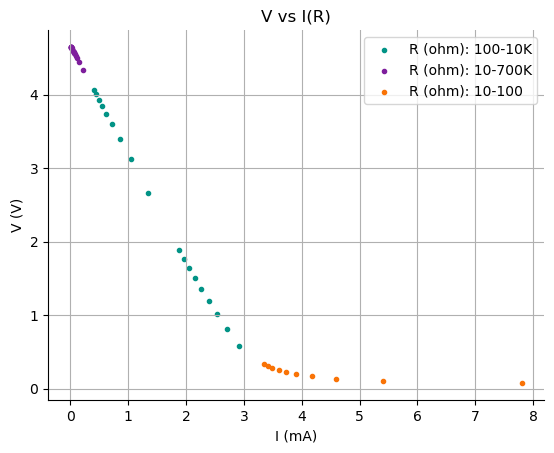

In [11]:
plt.scatter(1000*data[10:28,2], data[10:28,1], marker='.', color="xkcd:teal", label="R (ohm): 100-10K")
plt.scatter(1000*data[28:,2], data[28:,1], marker='.', color="xkcd:purple", label="R (ohm): 10-700K")
plt.scatter(1000*data[:10,2], data[:10,1], marker='.', color="xkcd:orange", label="R (ohm): 10-100")
plt.xlabel("I (mA)")
plt.ylabel("V (V)")
plt.title("V vs I(R)")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.grid()
plt.savefig("G1.png", dpi=300)

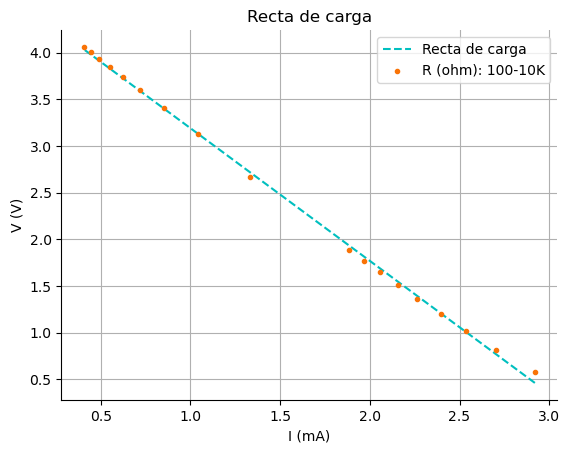

In [25]:
dataf = data[10:28]
res = stats.linregress(dataf[:,2], dataf[:,1])

def carga(x): return res.intercept+res.slope*x

plt.plot(1000*dataf[:,2], carga(dataf[:,2]), '--c', label="Recta de carga")
plt.scatter(1000*dataf[:,2], dataf[:,1], marker='.', color="xkcd:orange", label="R (ohm): 100-10K", zorder=2)
plt.xlabel("I (mA)")
plt.ylabel("V (V)")
plt.title("Recta de carga")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.grid()
plt.savefig("G2.png", dpi=300)

Intersección en [0.0019046376208391074, 1.904637620839107]


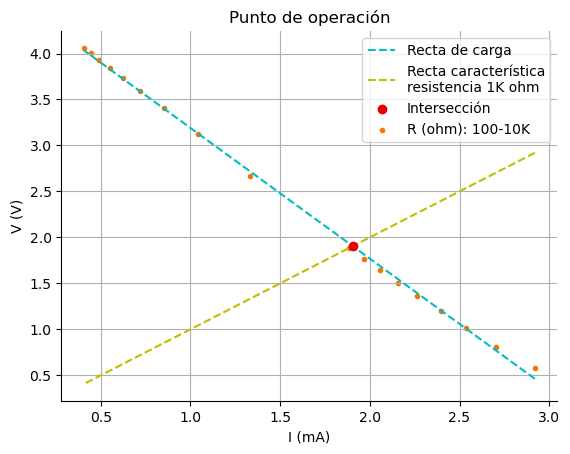

In [28]:
def caract(x): return 1000*x

def intersect(f1,f2,x0): return fsolve(lambda x: f1(x)-f2(x),x0)
inter_x = intersect(carga,caract,0.0)
inter = [inter_x[0], carga(inter_x)[0]]

plt.plot(1000*dataf[:,2], carga(dataf[:,2]), '--c', label="Recta de carga", zorder=2)
plt.plot(1000*dataf[:,2], caract(dataf[:,2]), '--y', label="Recta característica\nresistencia 1K ohm", zorder=2)
plt.scatter(1000*inter[0], inter[1], marker='o', color="xkcd:red", label="Intersección", zorder=3)
plt.scatter(1000*dataf[:,2], dataf[:,1], marker='.', color="xkcd:orange", label="R (ohm): 100-10K", zorder=1)
plt.xlabel("I (mA)")
plt.ylabel("V (V)")
plt.title("Punto de operación")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.grid()

plt.savefig("G3.png", dpi=300)

print(f"Intersección en {inter}")

In [84]:
carga_x = [0, -res.intercept/res.slope]
print(f"Intersección de recta de carga con eje x (Corriente de Norton): {carga_x}")

carga_y = [res.intercept, 0]
print(f"Intersección de recta de carga con eje y (Voltaje de Thévenin): {carga_y}")

print(f"Resistencia de Thévenin: {carga_y[0]/carga_x[1]}")

Intersección de recta de carga con eje x (Corriente de Norton): [0, 0.003245040598272653]
Intersección de recta de carga con eje y (Voltaje de Thévenin): [4.611021094905588, 0]
Resistencia de Thévenin: 1420.9440391470146
